# Carry out FAMD

## Calculate FAMD
### Reprepare data

In [1]:
from pandas import read_csv,to_numeric
from prince import FAMD
customer_churn = read_csv('../data/Customer_churn.csv', index_col="customerID")
customer_churn["TotalCharges"]=to_numeric(customer_churn["TotalCharges"],errors='coerce')
customer_churn = customer_churn.dropna()
labels = customer_churn['Churn']
customer_churn = customer_churn.drop(['Churn'], axis='columns')
customer_churn['SeniorCitizen'].replace({0: 'No', 1: 'Yes'}, inplace=True)

### Mark numerical columns

In [3]:
customer_churn["MonthlyCharges"]=to_numeric(customer_churn["MonthlyCharges"])
customer_churn["TotalCharges"]=to_numeric(customer_churn["TotalCharges"],errors='coerce')
customer_churn = customer_churn.dropna()
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null 

In [ ]:
### Calculate inertia

In [5]:
famd = FAMD(n_components=5, random_state=42)
famd.fit(customer_churn)
famd.explained_inertia_

array([0.32284402, 0.1942461 , 0.07908793, 0.03966729, 0.03492579])

In [6]:
from numpy import cumsum
cumsum(famd.explained_inertia_)

array([0.32284402, 0.51709012, 0.59617805, 0.63584535, 0.67077114])

### Save results

In [7]:
from update import update_csv
update_csv("FAMD",famd.explained_inertia_)

### Visualize results

<AxesSubplot:title={'center':'Row principal coordinates'}, xlabel='Component 0 (32.28% inertia)', ylabel='Component 1 (19.42% inertia)'>

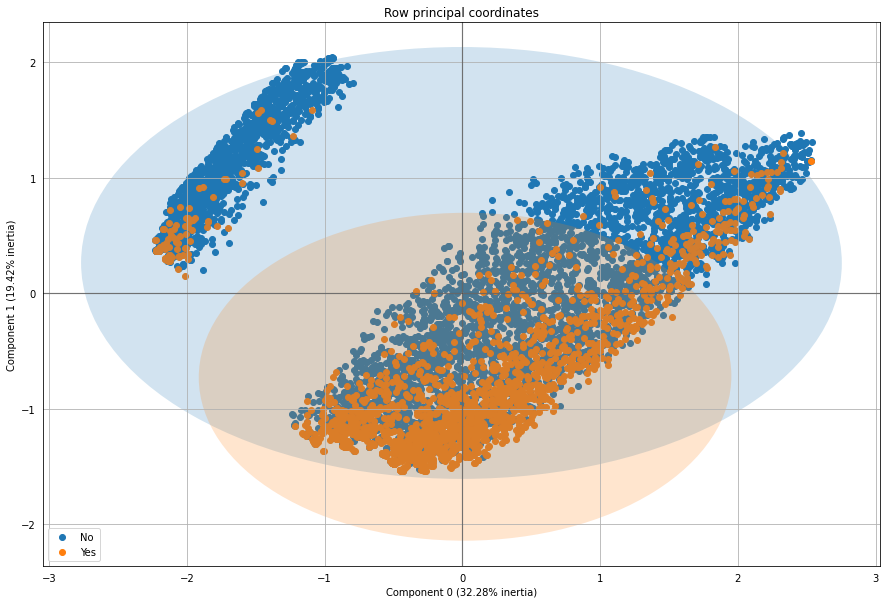

In [10]:
famd.plot_row_coordinates(customer_churn,figsize=(15, 10),color_labels=labels)

## Measure time

In [11]:
from update import measure_fit_time,measure_transform_time
measure_fit_time("FAMD",lambda x: FAMD(n_components=5).fit(x),customer_churn)
prefited_FAMD = FAMD(n_components=5)
prefited_FAMD.fit(customer_churn)
measure_transform_time("FAMD",lambda x: prefited_FAMD.transform(x),customer_churn)